In [66]:
import pandas as pd
import numpy as np

In [67]:
owid_source = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

In [68]:
data = pd.read_csv(owid_source)

In [69]:
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30216,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30217,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30218,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30219,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
LocationKeys = 	['iso_code','location']
DailyKeys = ['date','total_cases','new_cases', 'total_deaths', 'new_deaths']
DailyKeysExtra = ['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']
PermanentKeys = ['population','population_density', 'gdp_per_capita']
PermanentKeysExtra = ['median_age','aged_65_older','aged_70_older','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand']

In [71]:
df = data

In [72]:
df = df.drop(df[df['location']=='International'].index)
df = df.drop(df[df['location']=='World'].index)

In [73]:
case_threshold = 50
pm_case_threshold = 1

In [74]:
df = df.drop(df[df['total_cases_per_million']<pm_case_threshold].index)
# df = df.drop(df[df['total_cases']<case_threshold].index)

In [75]:
data_avail = df.groupby(['location']).count()

In [76]:
data_avail

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,113,113,113,113,113,113,113,113,113,113,113,0,0,0,0,0,0,0,108,113,113,113,113,113,113,0,113,113,0,0,113,113,113
Albania,127,127,127,127,127,127,127,127,127,127,127,0,0,0,0,0,0,0,119,127,127,127,127,127,127,127,127,127,127,127,0,127,127
Algeria,121,121,121,121,121,121,121,121,121,121,121,0,0,0,0,0,0,0,113,121,121,121,121,121,121,121,121,121,121,121,121,121,121
Andorra,123,123,123,123,123,123,123,123,123,123,123,0,0,0,0,0,0,0,115,123,123,0,0,0,0,0,123,123,123,123,0,0,123
Angola,73,73,73,73,73,73,73,73,73,73,73,0,0,0,0,0,0,0,68,73,73,73,73,73,73,0,73,73,0,0,73,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,118,118,118,114,114,114,114,114,114,114,114,25,15,25,15,38,38,42,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
Western Sahara,80,80,80,80,80,80,80,80,80,80,80,0,0,0,0,0,0,0,0,80,0,80,0,80,0,0,0,0,0,0,0,0,80
Yemen,67,67,67,67,67,67,67,67,67,67,67,0,0,0,0,0,0,0,63,67,67,67,67,67,67,67,67,67,67,67,67,67,67


In [77]:
data_avail = data_avail//7

In [78]:
data_avail = data_avail.drop(data_avail[data_avail['date']<10].index)

In [79]:
data_avail

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,16,16,16,16,16,16,16,16,16,16,0,0,0,0,0,0,0,15,16,16,16,16,16,16,0,16,16,0,0,16,16,16
Albania,18,18,18,18,18,18,18,18,18,18,18,0,0,0,0,0,0,0,17,18,18,18,18,18,18,18,18,18,18,18,0,18,18
Algeria,17,17,17,17,17,17,17,17,17,17,17,0,0,0,0,0,0,0,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Andorra,17,17,17,17,17,17,17,17,17,17,17,0,0,0,0,0,0,0,16,17,17,0,0,0,0,0,17,17,17,17,0,0,17
Angola,10,10,10,10,10,10,10,10,10,10,10,0,0,0,0,0,0,0,9,10,10,10,10,10,10,0,10,10,0,0,10,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,17,17,17,17,17,17,17,17,17,17,17,0,0,0,0,0,0,0,16,17,17,17,17,17,17,0,17,17,0,0,0,17,17
Vietnam,16,16,16,16,16,16,16,16,16,16,16,3,2,3,2,5,5,6,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Western Sahara,11,11,11,11,11,11,11,11,11,11,11,0,0,0,0,0,0,0,0,11,0,11,0,11,0,0,0,0,0,0,0,0,11


In [80]:
popcsv = 'https://covid.ourworldindata.org/data/ecdc/locations.csv'
population = pd.read_csv(popcsv)
population = population.drop(population[population['population']>100000].index).reset_index()

In [81]:
population

,index,countriesAndTerritories,location,continent,population_year,population
0,3,Andorra,Andorra,Europe,2020.0,77265.0
1,5,Anguilla,Anguilla,North America,2020.0,15002.0
2,6,Antigua_and_Barbuda,Antigua and Barbuda,North America,2020.0,97928.0
3,21,Bermuda,Bermuda,North America,2020.0,62273.0
4,24,"Bonaire, Saint Eustatius and Saba",Bonaire Sint Eustatius and Saba,North America,2020.0,26221.0
5,28,British_Virgin_Islands,British Virgin Islands,North America,2020.0,30237.0
6,37,Cases_on_an_international_conveyance_Japan,International,NaN,NaN,NaN
7,38,Cayman_Islands,Cayman Islands,North America,2020.0,65720.0
8,56,Dominica,Dominica,North America,2020.0,71991.0
9,66,Falkland_Islands_(Malvinas),Falkland Islands,South America,2020.0,3483.0


In [82]:
data_avail = data_avail.drop(population['location'],errors='ignore').reset_index()

In [83]:
data_avail

,location,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,16,16,16,16,16,16,16,16,16,16,16,0,0,0,0,0,0,0,15,16,16,16,16,16,16,0,16,16,0,0,16,16,16
1,Albania,18,18,18,18,18,18,18,18,18,18,18,0,0,0,0,0,0,0,17,18,18,18,18,18,18,18,18,18,18,18,0,18,18
2,Algeria,17,17,17,17,17,17,17,17,17,17,17,0,0,0,0,0,0,0,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17
3,Angola,10,10,10,10,10,10,10,10,10,10,10,0,0,0,0,0,0,0,9,10,10,10,10,10,10,0,10,10,0,0,10,0,10
4,Argentina,17,17,17,17,17,17,17,17,17,17,17,12,11,12,11,12,12,13,16,17,17,17,17,17,17,17,17,17,17,17,0,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Venezuela,17,17,17,17,17,17,17,17,17,17,17,0,0,0,0,0,0,0,16,17,17,17,17,17,17,0,17,17,0,0,0,17,17
178,Vietnam,16,16,16,16,16,16,16,16,16,16,16,3,2,3,2,5,5,6,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
179,Western Sahara,11,11,11,11,11,11,11,11,11,11,11,0,0,0,0,0,0,0,0,11,0,11,0,11,0,0,0,0,0,0,0,0,11
180,Zambia,15,15,15,15,15,15,15,15,15,15,15,0,0,0,0,0,0,0,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [84]:
data_avail['location']

0         Afghanistan
1             Albania
2             Algeria
3              Angola
4           Argentina
            ...      
177         Venezuela
178           Vietnam
179    Western Sahara
180            Zambia
181          Zimbabwe
Name: location, Length: 182, dtype: object

In [85]:
df = df.drop(df[~df['location'].isin(data_avail['location'])].index)

In [86]:
df["date"] = pd.to_datetime(df["date"])

In [87]:
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
74,AFG,Asia,Afghanistan,2020-03-24,40.0,6.0,1.0,1.0,1.028,0.154,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.93,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
75,AFG,Asia,Afghanistan,2020-03-25,42.0,2.0,1.0,0.0,1.079,0.051,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
76,AFG,Asia,Afghanistan,2020-03-26,75.0,33.0,1.0,0.0,1.927,0.848,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
77,AFG,Asia,Afghanistan,2020-03-27,75.0,0.0,1.0,0.0,1.927,0.000,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
78,AFG,Asia,Afghanistan,2020-03-28,91.0,16.0,2.0,1.0,2.338,0.411,0.051,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.59,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29955,ZWE,Africa,Zimbabwe,2020-07-10,926.0,41.0,12.0,3.0,62.303,2.759,0.807,0.202,36005.0,659.0,2.422,0.044,556.0,0.037,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
29956,ZWE,Africa,Zimbabwe,2020-07-11,942.0,16.0,13.0,1.0,63.379,1.077,0.875,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
29957,ZWE,Africa,Zimbabwe,2020-07-12,982.0,40.0,18.0,5.0,66.070,2.691,1.211,0.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
29958,ZWE,Africa,Zimbabwe,2020-07-13,985.0,3.0,18.0,0.0,66.272,0.202,1.211,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49


In [88]:
def tranf(obj):
  date_ret = obj.index
  return(date_ret - date_ret[0])

def tranf2(obj):
  date_ret = obj.index
  return((date_ret - date_ret[0])//7)

In [89]:
df['days'] = np.zeros(len(df), dtype='int64')
df['days'] = df.groupby('location')['date'].transform(tranf)
df['week'] = np.zeros(len(df), dtype='int64')
df['week'] = df.groupby('location')['date'].transform(tranf2)

In [90]:
Keys=LocationKeys+['week']+DailyKeys+DailyKeysExtra
train_data = df[Keys].reset_index(drop=True)

In [91]:
Keys=LocationKeys+['days']+DailyKeys+DailyKeysExtra
train_data_days = df[Keys].reset_index(drop=True)

In [92]:
df_melted = train_data.groupby(['location','week']).sum().reset_index()

In [93]:
df_melted_days = train_data_days.groupby(['location','days']).sum().reset_index()

In [94]:
df_melted

,location,week,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,Afghanistan,0,543.0,80.0,13.0,4.0,13.950,2.055,0.335,0.104
1,Afghanistan,1,1538.0,185.0,32.0,3.0,39.509,4.753,0.823,0.077
2,Afghanistan,2,3294.0,308.0,98.0,11.0,84.618,7.912,2.517,0.283
3,Afghanistan,3,5706.0,389.0,191.0,15.0,146.577,9.993,4.907,0.385
4,Afghanistan,4,8925.0,535.0,300.0,24.0,229.269,13.743,7.707,0.617
...,...,...,...,...,...,...,...,...,...,...
3199,Zimbabwe,9,3099.0,106.0,32.0,2.0,208.506,7.132,2.153,0.135
3200,Zimbabwe,10,3813.0,78.0,42.0,0.0,256.545,5.248,2.828,0.000
3201,Zimbabwe,11,4426.0,149.0,51.0,2.0,297.788,10.025,3.431,0.134
3202,Zimbabwe,12,6241.0,269.0,88.0,10.0,419.904,18.100,5.922,0.672


In [95]:
df_unmelted = df_melted.pivot(index='location', columns='week')

In [96]:
col_names = list(df_unmelted.columns)
col_names = [(col[0],str(col[1])) for col in col_names]
col_names = ['_'.join(col).strip() for col in col_names]
df_unmelted.columns = col_names
df_unmelted.reset_index()

,location,total_cases_0,total_cases_1,total_cases_2,total_cases_3,total_cases_4,total_cases_5,total_cases_6,total_cases_7,total_cases_8,total_cases_9,total_cases_10,total_cases_11,total_cases_12,total_cases_13,total_cases_14,total_cases_15,total_cases_16,total_cases_17,total_cases_18,total_cases_19,total_cases_20,total_cases_21,total_cases_22,total_cases_23,total_cases_24,new_cases_0,new_cases_1,new_cases_2,new_cases_3,new_cases_4,new_cases_5,new_cases_6,new_cases_7,new_cases_8,new_cases_9,new_cases_10,new_cases_11,new_cases_12,new_cases_13,...,total_deaths_per_million_10,total_deaths_per_million_11,total_deaths_per_million_12,total_deaths_per_million_13,total_deaths_per_million_14,total_deaths_per_million_15,total_deaths_per_million_16,total_deaths_per_million_17,total_deaths_per_million_18,total_deaths_per_million_19,total_deaths_per_million_20,total_deaths_per_million_21,total_deaths_per_million_22,total_deaths_per_million_23,total_deaths_per_million_24,new_deaths_per_million_0,new_deaths_per_million_1,new_deaths_per_million_2,new_deaths_per_million_3,new_deaths_per_million_4,new_deaths_per_million_5,new_deaths_per_million_6,new_deaths_per_million_7,new_deaths_per_million_8,new_deaths_per_million_9,new_deaths_per_million_10,new_deaths_per_million_11,new_deaths_per_million_12,new_deaths_per_million_13,new_deaths_per_million_14,new_deaths_per_million_15,new_deaths_per_million_16,new_deaths_per_million_17,new_deaths_per_million_18,new_deaths_per_million_19,new_deaths_per_million_20,new_deaths_per_million_21,new_deaths_per_million_22,new_deaths_per_million_23,new_deaths_per_million_24
0,Afghanistan,543.0,1538.0,3294.0,5706.0,8925.0,15158.0,25286.0,39687.0,61342.0,91885.0,126442.0,159823.0,191378.0,210548.0,224560.0,237807.0,34455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,185.0,308.0,389.0,535.0,1173.0,1698.0,2262.0,3918.0,4623.0,5137.0,4424.0,4067.0,2134.0,...,54.510,75.831,95.484,119.117,143.057,173.755,25.996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104,0.077,0.283,0.385,0.617,0.720,0.897,1.258,1.258,1.004,2.569,2.927,2.825,3.597,3.673,3.751,0.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,163.0,470.0,1138.0,2000.0,2864.0,3603.0,4606.0,5391.0,5871.0,6321.0,6798.0,7517.0,8378.0,9689.0,12428.0,15349.0,18707.0,22399.0,3571.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,47.0,123.0,149.0,85.0,116.0,164.0,69.0,73.0,78.0,52.0,139.0,109.0,275.0,...,75.752,79.922,80.965,85.137,96.949,119.536,165.404,206.059,33.011,NaN,NaN,NaN,NaN,NaN,NaN,0.347,0.347,2.778,3.821,0.694,1.041,0.694,1.042,0.000,0.000,0.347,0.347,0.347,0.694,2.777,3.822,7.296,5.907,0.695,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,569.0,2227.0,6066.0,11035.0,15348.0,20458.0,26851.0,35066.0,43826.0,52898.0,61761.0,67975.0,73382.0,78885.0,86113.0,100250.0,120900.0,38884.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,315.0,797.0,574.0,710.0,721.0,1039.0,1263.0,1263.0,1292.0,1154.0,783.0,760.0,821.0,...,99.496,107.570,116.986,127.796,138.697,146.976,155.915,46.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.297,0.320,2.303,3.307,2.098,1.184,0.913,0.799,1.095,1.142,1.230,1.185,1.412,1.757,1.254,1.230,1.323,0.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,256.0,319.0,364.0,490.0,600.0,726.0,1038.0,1315.0,2005.0,2638.0,1495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,12.0,17.0,9.0,44.0,36.0,46.0,116.0,130.0,48.0,NaN,NaN,NaN,...,2.343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.030,0.030,0.000,0.030,0.090,0.060,0.243,0.151,0.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,808.0,3480.0,7734.0,12698.0,17385.0,22971.0,29745.0,36565.0,47592.0,66110.0,98109.0,134087.0,183516.0,250308.0,345065.0,467161.0,599248.0,203258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,520.0,706.0,686.0,691.0,939.0,901.0,1095.0,2029.0,3548.0,4861.0,5806.0,8275.0,10909.0,...,76.534,91.049,114.480,141.120,170.060,208.647,255.223,82.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044,0.332,0.531,1.018,0.952,1.172,1.151,1.394,1.394,1.814,1.837,2.656,3.696,3.916,4.757,5.443,7.900,2.058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,.

In [97]:
df_unmelted.to_csv('unmelted_weekwise.csv')

In [65]:
df_merge = df[['location']+PermanentKeys+PermanentKeysExtra]
df_merge = df_merge.drop_duplicates() 
df_merge

,location,population,population_density,gdp_per_capita,median_age,aged_65_older,aged_70_older,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
74,Afghanistan,38928341.0,54.422,1803.987,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN,37.746,0.50
188,Albania,2877800.0,104.871,11803.431,38.0,13.188,8.643,1.1,304.195,10.08,7.1,51.2,NaN,2.89
386,Algeria,43851043.0,17.348,13913.839,29.1,6.211,3.857,0.5,278.364,6.73,0.7,30.4,83.741,1.90
672,Angola,32866268.0,23.890,5819.495,16.8,2.405,1.362,NaN,276.045,3.94,NaN,NaN,26.664,NaN
981,Argentina,45195777.0,16.177,18933.907,31.9,11.198,7.441,0.6,191.032,5.50,16.2,27.7,NaN,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29234,Venezuela,28435943.0,36.253,16745.022,29.0,6.614,3.915,NaN,204.850,6.47,NaN,NaN,NaN,0.80
29416,Vietnam,97338583.0,308.127,6171.884,32.6,7.150,4.718,2.0,245.465,6.00,1.0,45.9,85.847,2.60
29550,Western Sahara,597330.0,NaN,NaN,28.4,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29736,Zambia,18383956.0,22.995,3689.251,17.7,2.480,1.542,57.5,234.499,3.94,3.1,24.7,13.938,2.00


In [ ]:
result = pd.merge(df_unmelted, df_merge, how='left', on=['location'])

In [ ]:
result[result.isnull().any(axis=1)]

,location,total_cases_0,total_cases_1,total_cases_2,total_cases_3,total_cases_4,total_cases_5,total_cases_6,total_cases_7,total_cases_8,total_cases_9,total_cases_10,total_cases_11,total_cases_12,total_cases_13,total_cases_14,total_cases_15,total_cases_16,total_cases_17,total_cases_18,total_cases_19,total_cases_20,new_cases_0,new_cases_1,new_cases_2,new_cases_3,new_cases_4,new_cases_5,new_cases_6,new_cases_7,new_cases_8,new_cases_9,new_cases_10,new_cases_11,new_cases_12,new_cases_13,new_cases_14,new_cases_15,new_cases_16,new_cases_17,...,total_deaths_per_million_15,total_deaths_per_million_16,total_deaths_per_million_17,total_deaths_per_million_18,total_deaths_per_million_19,total_deaths_per_million_20,new_deaths_per_million_0,new_deaths_per_million_1,new_deaths_per_million_2,new_deaths_per_million_3,new_deaths_per_million_4,new_deaths_per_million_5,new_deaths_per_million_6,new_deaths_per_million_7,new_deaths_per_million_8,new_deaths_per_million_9,new_deaths_per_million_10,new_deaths_per_million_11,new_deaths_per_million_12,new_deaths_per_million_13,new_deaths_per_million_14,new_deaths_per_million_15,new_deaths_per_million_16,new_deaths_per_million_17,new_deaths_per_million_18,new_deaths_per_million_19,new_deaths_per_million_20,population,population_density,gdp_per_capita,median_age,aged_65_older,aged_70_older,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,Afghanistan,543.0,1538.0,3294.0,5706.0,8925.0,15158.0,25286.0,39687.0,61342.0,91885.0,126442.0,159823.0,78711.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,185.0,308.0,389.0,535.0,1173.0,1698.0,2262.0,3918.0,4623.0,5137.0,4424.0,2108.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.104,0.077,0.283,0.385,0.617,0.720,0.897,1.258,1.258,1.004,2.569,2.927,0.848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341,54.422,1803.987,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN,37.746,0.50
1,Albania,163.0,470.0,1138.0,2000.0,2864.0,3603.0,4606.0,5391.0,5871.0,6321.0,6798.0,7517.0,8378.0,9689.0,4984.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,47.0,123.0,149.0,85.0,116.0,164.0,69.0,73.0,78.0,52.0,139.0,109.0,275.0,201.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.347,0.347,2.778,3.821,0.694,1.041,0.694,1.042,0.000,0.000,0.347,0.347,0.347,0.694,0.694,NaN,NaN,NaN,NaN,NaN,NaN,2877800,104.871,11803.431,38.0,13.188,8.643,1.1,304.195,10.08,7.1,51.2,NaN,2.89
2,Algeria,569.0,2227.0,6066.0,11035.0,15348.0,20458.0,26851.0,35066.0,43826.0,52898.0,61761.0,67975.0,73382.0,44365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,315.0,797.0,574.0,710.0,721.0,1039.0,1263.0,1263.0,1292.0,1154.0,783.0,760.0,458.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.297,0.320,2.303,3.307,2.098,1.184,0.913,0.799,1.095,1.142,1.230,1.185,1.412,0.890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43851043,17.348,13913.839,29.1,6.211,3.857,0.5,278.364,6.73,0.7,30.4,83.741,1.90
3,Argentina,808.0,3480.0,7734.0,12698.0,17385.0,22971.0,29745.0,36565.0,47592.0,66110.0,98109.0,134087.0,183516.0,134021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,520.0,706.0,686.0,691.0,939.0,901.0,1095.0,2029.0,3548.0,4861.0,5806.0,8275.0,5257.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.044,0.332,0.531,1.018,0.952,1.172,1.151,1.394,1.394,1.814,1.837,2.656,3.696,2.168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777,16.177,18933.907,31.9,11.198,7.441,0.6,191.032,5.50,16.2,27.7,NaN,5.00
4,Armenia,203.0,1182.0,2853.0,5248.0,6869.0,9112.0,12149.0,15931.0,22113.0,30241.0,44283.0,62376.0,86056.0,111277.0,18033.0,NaN,NaN,NaN,NaN,NaN,NaN,77.0,187.0,267.0,321.0,258.0,362.0,459.0,687.0,919.0,1503.0,2361.0,2607.0,3666.0,3814.0,544.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,1.012,1.686,3.035,2.361,2.023,3.374,2.360,5.734,9.111,22.610,19.911,25.648,3.037,NaN,NaN,NaN,NaN,NaN,NaN,2963234,102.931,8787.580,35.7,11.232,7.571,1.8,341.010,7.11,1.5,52.1,94.043,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df_melted_days

,location,days,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,Afghanistan,0,40.0,6.0,1.0,1.0,1.028,0.154,0.026,0.026
1,Afghanistan,1,42.0,2.0,1.0,0.0,1.079,0.051,0.026,0.000
2,Afghanistan,2,75.0,33.0,1.0,0.0,1.927,0.848,0.026,0.000
3,Afghanistan,3,75.0,0.0,1.0,0.0,1.927,0.000,0.026,0.000
4,Afghanistan,4,91.0,16.0,2.0,1.0,2.338,0.411,0.051,0.026
...,...,...,...,...,...,...,...,...,...,...
15943,Zambia,77,1357.0,36.0,10.0,0.0,73.814,1.958,0.544,0.000
15944,Zambia,78,1358.0,1.0,11.0,1.0,73.869,0.054,0.598,0.054
15945,Zambia,79,1382.0,24.0,11.0,0.0,75.174,1.305,0.598,0.000
15946,Zambia,80,1405.0,23.0,11.0,0.0,76.425,1.251,0.598,0.000


In [ ]:
df_melted_days['new_cases_ma'] = df_melted_days.groupby(['location']).rolling(7)['new_cases'].mean().reset_index(drop=True)
df_melted_days['new_cases_pm_ma'] = df_melted_days.groupby(['location']).rolling(7)['new_cases_per_million'].mean().reset_index(drop=True)

In [ ]:
df_melted_days

,location,days,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_cases_ma,new_cases_pm_ma
0,Afghanistan,0,40.0,6.0,1.0,1.0,1.028,0.154,0.026,0.026,NaN,NaN
1,Afghanistan,1,42.0,2.0,1.0,0.0,1.079,0.051,0.026,0.000,NaN,NaN
2,Afghanistan,2,75.0,33.0,1.0,0.0,1.927,0.848,0.026,0.000,NaN,NaN
3,Afghanistan,3,75.0,0.0,1.0,0.0,1.927,0.000,0.026,0.000,NaN,NaN
4,Afghanistan,4,91.0,16.0,2.0,1.0,2.338,0.411,0.051,0.026,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15943,Zambia,77,1357.0,36.0,10.0,0.0,73.814,1.958,0.544,0.000,29.000000,1.577429
15944,Zambia,78,1358.0,1.0,11.0,1.0,73.869,0.054,0.598,0.054,29.142857,1.585143
15945,Zambia,79,1382.0,24.0,11.0,0.0,75.174,1.305,0.598,0.000,26.000000,1.414143
15946,Zambia,80,1405.0,23.0,11.0,0.0,76.425,1.251,0.598,0.000,29.285714,1.592857


In [ ]:
df_new_cases = df_melted_days[['location','days','new_cases','new_cases_ma','new_cases_per_million','new_cases_pm_ma','total_cases','total_cases_per_million']]

In [ ]:
max(df_new_cases['days'])

144

In [ ]:
len(df_new_cases.groupby('location').groups.keys())

165

In [ ]:
df_new_cases.groupby('location').get_group('India')

,location,days,new_cases,new_cases_ma,new_cases_per_million,new_cases_pm_ma,total_cases,total_cases_per_million
6802,India,0,146.0,NaN,0.106,NaN,1397.0,1.012
6803,India,1,568.0,NaN,0.412,NaN,1965.0,1.424
6804,India,2,336.0,NaN,0.243,NaN,2301.0,1.667
6805,India,3,601.0,NaN,0.436,NaN,2902.0,2.103
6806,India,4,472.0,NaN,0.342,NaN,3374.0,2.445
...,...,...,...,...,...,...,...,...
6876,India,74,11929.0,10613.428571,8.644,7.690714,320922.0,232.551
6877,India,75,11502.0,10830.428571,8.335,7.848000,332424.0,240.886
6878,India,76,10667.0,10927.571429,7.730,7.918429,343091.0,248.616
6879,India,77,10974.0,11068.857143,7.952,8.020857,354065.0,256.568


In [ ]:
df_new_unmelted = df_new_cases.pivot(index='location', columns='days')

In [ ]:
df_new_unmelted

new_cases                                ... total_cases_per_million                    
days              0     1     2     3     4     5    ...                     139 140 141 142 143 144
location                                             ...                                            
Afghanistan       6.0   2.0  33.0   0.0  16.0  15.0  ...                     NaN NaN NaN NaN NaN NaN
Albania           4.0   4.0   1.0  12.0  10.0   5.0  ...                     NaN NaN NaN NaN NaN NaN
Algeria          11.0  10.0   2.0  12.0  18.0  12.0  ...                     NaN NaN NaN NaN NaN NaN
Argentina        11.0   9.0  14.0  18.0  31.0  30.0  ...                     NaN NaN NaN NaN NaN NaN
Armenia           3.0   2.0   7.0   7.0  10.0  22.0  ...                     NaN NaN NaN NaN NaN NaN
...               ...   ...   ...   ...   ...   ...  ...                     ...  ..  ..  ..  ..  ..
Uruguay           6.0   2.0  21.0  21.0  29.0  15.0  ...                     NaN NaN NaN NaN NaN NaN
Uzbekistan       13.0   3.0   6.0  10.0  18.0  21.0  ...                     NaN NaN NaN NaN NaN NaN
Venezuela        18.0   0.0   0.0   0.0   3.0   0.0  ...                     NaN NaN NaN NaN NaN NaN
Vietnam           0.0   0.0   0.0   0.0   NaN   NaN  ...                     NaN NaN NaN NaN NaN NaN
Zambia           12.0   1.0   6.0   0.0   1.0   3.0  ...                     NaN NaN NaN NaN NaN NaN

[165 rows x 870 columns]

In [ ]:
df_new_unmelted_save = df_new_cases.pivot(index='location', columns='days')
col_names = list(df_new_unmelted_save.columns)
col_names = [(col[0],str(col[1])) for col in col_names]
col_names = ['_'.join(col).strip() for col in col_names]
df_new_unmelted_save.columns = col_names
df_new_unmelted_save.reset_index()

,location,new_cases_0,new_cases_1,new_cases_2,new_cases_3,new_cases_4,new_cases_5,new_cases_6,new_cases_7,new_cases_8,new_cases_9,new_cases_10,new_cases_11,new_cases_12,new_cases_13,new_cases_14,new_cases_15,new_cases_16,new_cases_17,new_cases_18,new_cases_19,new_cases_20,new_cases_21,new_cases_22,new_cases_23,new_cases_24,new_cases_25,new_cases_26,new_cases_27,new_cases_28,new_cases_29,new_cases_30,new_cases_31,new_cases_32,new_cases_33,new_cases_34,new_cases_35,new_cases_36,new_cases_37,new_cases_38,...,total_cases_per_million_105,total_cases_per_million_106,total_cases_per_million_107,total_cases_per_million_108,total_cases_per_million_109,total_cases_per_million_110,total_cases_per_million_111,total_cases_per_million_112,total_cases_per_million_113,total_cases_per_million_114,total_cases_per_million_115,total_cases_per_million_116,total_cases_per_million_117,total_cases_per_million_118,total_cases_per_million_119,total_cases_per_million_120,total_cases_per_million_121,total_cases_per_million_122,total_cases_per_million_123,total_cases_per_million_124,total_cases_per_million_125,total_cases_per_million_126,total_cases_per_million_127,total_cases_per_million_128,total_cases_per_million_129,total_cases_per_million_130,total_cases_per_million_131,total_cases_per_million_132,total_cases_per_million_133,total_cases_per_million_134,total_cases_per_million_135,total_cases_per_million_136,total_cases_per_million_137,total_cases_per_million_138,total_cases_per_million_139,total_cases_per_million_140,total_cases_per_million_141,total_cases_per_million_142,total_cases_per_million_143,total_cases_per_million_144
0,Afghanistan,6.0,2.0,33.0,0.0,16.0,15.0,8.0,27.0,25.0,26.0,43.0,0.0,35.0,29.0,38.0,30.0,56.0,61.0,37.0,34.0,52.0,58.0,49.0,70.0,10.0,51.0,63.0,88.0,35.0,61.0,84.0,105.0,70.0,112.0,68.0,172.0,124.0,122.0,222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,4.0,4.0,1.0,12.0,10.0,5.0,4.0,9.0,4.0,4.0,11.0,0.0,6.0,13.0,11.0,23.0,23.0,28.0,12.0,11.0,15.0,11.0,20.0,16.0,18.0,27.0,29.0,28.0,16.0,6.0,17.0,9.0,7.0,17.0,13.0,21.0,8.0,19.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,11.0,10.0,2.0,12.0,18.0,12.0,37.0,62.0,29.0,34.0,38.0,65.0,42.0,45.0,57.0,73.0,132.0,131.0,139.0,185.0,80.0,69.0,103.0,45.0,104.0,94.0,95.0,64.0,89.0,69.0,87.0,90.0,108.0,150.0,117.0,94.0,89.0,93.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,11.0,9.0,14.0,18.0,31.0,30.0,67.0,41.0,35.0,86.0,115.0,87.0,101.0,55.0,75.0,146.0,0.0,167.0,0.0,132.0,186.0,103.0,74.0,87.0,80.0,99.0,81.0,162.0,66.0,69.0,160.0,0.0,128.0,98.0,170.0,102.0,90.0,112.0,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Armenia,3.0,2.0,7.0,7.0,10.0,22.0,26.0,37.0,7.0,14.0,24.0,30.0,4.0,71.0,25.0,39.0,43.0,52.0,0.0,58.0,50.0,39.0,92.0,73.0,34.0,52.0,11.0,20.0,28.0,40.0,16.0,30.0,46.0,26.0,72.0,48.0,42.0,47.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,6.0,2.0,21.0,21.0,29.0,15.0,16.0,25.0,23.0,4.0,27.0,28.0,21.0,0.0,21.0,36.0,29.0,6.0,11.0,18.0,12.0,19.0,17.0,4.0,6.0,9.0,7.0,13.0,7.0,12.0,7.0,11.0,10.0,9.0,6.0,9.0,11.0,7.0,8.0,.

In [ ]:
df_new_unmelted_save.to_csv('data_daywise.csv')

In [ ]:
df_new_unmelted = df_new_unmelted.T

In [ ]:
df_new_unmelted.to_csv('peak_train.csv')

In [ ]:
(len(df_new_unmelted.index.get_level_values(0).unique()), len(df_new_unmelted.index.get_level_values(1).unique()), df_new_unmelted.shape[1])

(6, 145, 165)

In [ ]:
matrix = df_new_unmelted.values.reshape((len(df_new_unmelted.index.get_level_values(0).unique()), len(df_new_unmelted.index.get_level_values(1).unique()), df_new_unmelted.shape[1]))
matrix = matrix.T
matrix.shape

(165, 145, 6)

In [ ]:
np.save('peak_train.npy',matrix)

In [ ]:
labels = pd.read_csv('peak_labels_2.csv')

In [ ]:
labels

,location,peak_day,current_day,has_peaked,notuseable,notuseable_3,notuseable_6,notuseable2x
0,Afghanistan,74,84,1,False,False,False,False
1,Albania,98,98,0,False,False,False,False
2,Algeria,72,92,1,False,False,False,False
3,Argentina,92,92,0,False,False,False,False
4,Armenia,88,96,1,False,False,False,False
...,...,...,...,...,...,...,...,...
158,Uruguay,16,93,1,False,True,True,True
159,Uzbekistan,82,85,0,False,False,False,False
160,Venezuela,83,91,1,False,False,False,False
161,Vietnam,26,105,1,True,True,True,True


In [ ]:
labels[labels['notuseable_3']==True]

,location,peak_day,current_day,has_peaked,notuseable,notuseable_3,notuseable_6,notuseable2x
5,Aruba,8,85,1,True,True,True,True
9,Bahamas,21,90,1,False,True,True,False
12,Barbados,21,90,1,False,True,True,False
15,Belize,21,84,1,False,True,True,False
22,Brunei,8,97,1,True,True,True,True
24,Burkina Faso,24,89,1,False,True,True,False
25,Cambodia,6,91,1,True,True,True,True
31,China,19,142,1,False,True,True,True
37,Cuba,25,88,1,False,True,True,False
38,Curacao,6,84,1,True,True,True,True


In [ ]:
train_mat = df_new_unmelted.T

In [ ]:
train_mat = train_mat.drop(labels[labels['notuseable_3']==True]['location'])

In [ ]:
train_mat

new_cases                             ... total_cases_per_million                
days                 0     1      2      3      4    ...                     140 141 142 143 144
location                                             ...                                        
Afghanistan          6.0   2.0   33.0    0.0   16.0  ...                     NaN NaN NaN NaN NaN
Albania              4.0   4.0    1.0   12.0   10.0  ...                     NaN NaN NaN NaN NaN
Algeria             11.0  10.0    2.0   12.0   18.0  ...                     NaN NaN NaN NaN NaN
Argentina           11.0   9.0   14.0   18.0   31.0  ...                     NaN NaN NaN NaN NaN
Armenia              3.0   2.0    7.0    7.0   10.0  ...                     NaN NaN NaN NaN NaN
...                  ...   ...    ...    ...    ...  ...                     ...  ..  ..  ..  ..
United Kingdom      34.0  30.0   48.0   43.0   67.0  ...                     NaN NaN NaN NaN NaN
United States      105.0  95.0  121.0  200.0  271.0  ...                     NaN NaN NaN NaN NaN
Uzbekistan          13.0   3.0    6.0   10.0   18.0  ...                     NaN NaN NaN NaN NaN
Venezuela           18.0   0.0    0.0    0.0    3.0  ...                     NaN NaN NaN NaN NaN
Zambia              12.0   1.0    6.0    0.0    1.0  ...                     NaN NaN NaN NaN NaN

[128 rows x 870 columns]

In [ ]:
labels = labels.drop(labels[labels['notuseable_3']==True].index)

In [ ]:
labels = labels.reset_index(drop=True)

In [ ]:
labels.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
location,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Cameroon,Canada,Cape Verde,Central African Republic,Chile,Colombia,Congo,Costa Rica,Cote d'Ivoire,Croatia,Democratic Republic of Congo,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Finland,...,Nigeria,Norway,Oman,Pakistan,Palestine,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Singapore,Slovakia,South Africa,Spain,Sri Lanka,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Togo,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Zambia
peak_day,74,98,72,92,88,30,28,96,107,104,76,43,41,80,92,52,73,86,95,82,59,86,74,96,103,79,98,83,33,69,36,76,92,50,92,83,62,82,34,40,...,72,30,103,88,54,99,64,90,82,100,34,75,90,38,55,87,96,76,54,89,40,130,31,75,80,82,102,34,51,35,59,30,58,85,87,41,35,82,83,47
current_day,84,98,92,92,96,107,107,96,111,104,105,104,75,94,92,92,76,91,96,87,102,87,81,96,103,79,98,83,108,77,104,89,94,94,92,83,89,82,105,106,...,72,108,103,89,99,99,101,104,93,105,107,80,102,97,89,87,96,106,111,139,97,130,107,91,88,85,108,108,71,116,87,90,73,85,109,103,101,85,91,79
has_peaked,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,1,...,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1
notuseable,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
notuseable_3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
notuseable_6,False,False,False,False,False,True,True,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,True,True,...,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,True,True,True,False,True,False,False,False,True,True,False,False,True
notuseable2x,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_mat_np = train_mat.T.values.reshape((len(train_mat.T.index.get_level_values(0).unique()), len(train_mat.T.index.get_level_values(1).unique()), train_mat.T.shape[1]))
train_mat_np = train_mat_np.T
train_mat_np.shape

(128, 145, 6)

In [ ]:
print(labels['current_day'].get(5))

107


In [ ]:
one_week_mat = list()

In [ ]:
lag=3

In [ ]:
labels['location'].get(29)

'Democratic Republic of Congo'

In [ ]:
for i in range(len(labels['location'])):
  # print(i,labels['peak_day'].get(i))
  one_week_mat.append(train_mat_np[i,labels['peak_day'].get(i)-7*(lag+1):labels['peak_day'].get(i)-7*lag,:])

In [ ]:
for i in range(len(one_week_mat)):
  if one_week_mat[i].shape[0]==0:
    print(i,labels['location'].get(i),one_week_mat[i].shape[0]==0)

In [ ]:
one_week_mat = np.array(one_week_mat)

In [ ]:
one_week_mat.shape

(126, 7, 6)

In [ ]:
train_x = one_week_mat

In [ ]:
train_y = labels['has_peaked'].values

In [ ]:
train_x.shape,train_y.shape

((126, 7, 6), (126,))

In [ ]:
train_x

array([[[2.15000000e+02, 2.06142857e+02, 5.52300000e+00, 5.29557143e+00,
         3.77800000e+03, 9.70500000e+01],
        [2.55000000e+02, 2.23428571e+02, 6.55000000e+00, 5.73957143e+00,
         4.03300000e+03, 1.03601000e+02],
        [3.69000000e+02, 2.42571429e+02, 9.47900000e+00, 6.23128571e+00,
         4.40200000e+03, 1.13080000e+02],
        ...,
        [2.80000000e+02, 2.49000000e+02, 7.19300000e+00, 6.39642857e+00,
         4.96700000e+03, 1.27593000e+02],
        [2.59000000e+02, 2.62000000e+02, 6.65300000e+00, 6.73028571e+00,
         5.22600000e+03, 1.34247000e+02],
        [1.13000000e+02, 2.53714286e+02, 2.90300000e+00, 6.51742857e+00,
         5.33900000e+03, 1.37149000e+02]],

       [[2.00000000e+00, 1.08571429e+01, 6.95000000e-01, 3.77271429e+00,
         9.48000000e+02, 3.29418000e+02],
        [1.00000000e+00, 1.04285714e+01, 3.47000000e-01, 3.62371429e+00,
         9.49000000e+02, 3.29766000e+02],
        [1.50000000e+01, 1.20000000e+01, 5.21200000e+00, 4.169714

In [ ]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.optimizers import SGD, Adam

sgd = SGD(lr=1e-10, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:
model = Sequential()
model.add(LSTM(28, activation='relu', input_shape=(7, 6)))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 28)                3920      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 29        
Total params: 3,949
Trainable params: 3,949
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.argwhere(np.isnan(train_x))

array([[  5,   0,   1],
       [  5,   0,   3],
       [  5,   1,   1],
       [  5,   1,   3],
       [  5,   2,   1],
       [  5,   2,   3],
       [  5,   3,   1],
       [  5,   3,   3],
       [  6,   0,   1],
       [  6,   0,   3],
       [  6,   1,   1],
       [  6,   1,   3],
       [  6,   2,   1],
       [  6,   2,   3],
       [  6,   3,   1],
       [  6,   3,   3],
       [  6,   4,   1],
       [  6,   4,   3],
       [  6,   5,   1],
       [  6,   5,   3],
       [ 28,   0,   1],
       [ 28,   0,   3],
       [ 40,   0,   1],
       [ 40,   0,   3],
       [ 40,   1,   1],
       [ 40,   1,   3],
       [ 46,   0,   1],
       [ 46,   0,   3],
       [ 46,   1,   1],
       [ 46,   1,   3],
       [ 46,   2,   1],
       [ 46,   2,   3],
       [ 61,   0,   1],
       [ 61,   0,   3],
       [ 69,   0,   1],
       [ 69,   0,   3],
       [ 69,   1,   0],
       [ 69,   1,   1],
       [ 69,   1,   2],
       [ 69,   1,   3],
       [ 69,   1,   4],
       [ 69,   1

In [ ]:
train_x

array([[[2.15000000e+02, 2.06142857e+02, 5.52300000e+00, 5.29557143e+00,
         3.77800000e+03, 9.70500000e+01],
        [2.55000000e+02, 2.23428571e+02, 6.55000000e+00, 5.73957143e+00,
         4.03300000e+03, 1.03601000e+02],
        [3.69000000e+02, 2.42571429e+02, 9.47900000e+00, 6.23128571e+00,
         4.40200000e+03, 1.13080000e+02],
        ...,
        [2.80000000e+02, 2.49000000e+02, 7.19300000e+00, 6.39642857e+00,
         4.96700000e+03, 1.27593000e+02],
        [2.59000000e+02, 2.62000000e+02, 6.65300000e+00, 6.73028571e+00,
         5.22600000e+03, 1.34247000e+02],
        [1.13000000e+02, 2.53714286e+02, 2.90300000e+00, 6.51742857e+00,
         5.33900000e+03, 1.37149000e+02]],

       [[2.00000000e+00, 1.08571429e+01, 6.95000000e-01, 3.77271429e+00,
         9.48000000e+02, 3.29418000e+02],
        [1.00000000e+00, 1.04285714e+01, 3.47000000e-01, 3.62371429e+00,
         9.49000000e+02, 3.29766000e+02],
        [1.50000000e+01, 1.20000000e+01, 5.21200000e+00, 4.169714

In [ ]:
train_x[np.isnan(train_x)]=0

In [ ]:
train_x

array([[[2.15000000e+02, 2.06142857e+02, 5.52300000e+00, 5.29557143e+00,
         3.77800000e+03, 9.70500000e+01],
        [2.55000000e+02, 2.23428571e+02, 6.55000000e+00, 5.73957143e+00,
         4.03300000e+03, 1.03601000e+02],
        [3.69000000e+02, 2.42571429e+02, 9.47900000e+00, 6.23128571e+00,
         4.40200000e+03, 1.13080000e+02],
        ...,
        [2.80000000e+02, 2.49000000e+02, 7.19300000e+00, 6.39642857e+00,
         4.96700000e+03, 1.27593000e+02],
        [2.59000000e+02, 2.62000000e+02, 6.65300000e+00, 6.73028571e+00,
         5.22600000e+03, 1.34247000e+02],
        [1.13000000e+02, 2.53714286e+02, 2.90300000e+00, 6.51742857e+00,
         5.33900000e+03, 1.37149000e+02]],

       [[2.00000000e+00, 1.08571429e+01, 6.95000000e-01, 3.77271429e+00,
         9.48000000e+02, 3.29418000e+02],
        [1.00000000e+00, 1.04285714e+01, 3.47000000e-01, 3.62371429e+00,
         9.49000000e+02, 3.29766000e+02],
        [1.50000000e+01, 1.20000000e+01, 5.21200000e+00, 4.169714

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scalers = {}
# for i in range(X_train.shape[2]):
#     scalers[i] = StandardScaler()
#     X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 

In [ ]:
history = model.fit(train_x,train_y,epochs = 2000,verbose=True)

Epoch 1/2000
126/126 [==============================] - 0s 3ms/step - loss: 3707.9306 - accuracy: 0.4048
Epoch 2/2000
126/126 [==============================] - 0s 182us/step - loss: 1724.2960 - accuracy: 0.3413
Epoch 3/2000
126/126 [==============================] - 0s 159us/step - loss: 1692.6666 - accuracy: 0.4127
Epoch 4/2000
126/126 [==============================] - 0s 164us/step - loss: 880.9002 - accuracy: 0.4286
Epoch 5/2000
126/126 [==============================] - 0s 169us/step - loss: 3426.9887 - accuracy: 0.4524
Epoch 6/2000
126/126 [==============================] - 0s 165us/step - loss: 3383.4476 - accuracy: 0.4206
Epoch 7/2000
126/126 [==============================] - 0s 163us/step - loss: 507.6080 - accuracy: 0.4603
Epoch 8/2000
126/126 [==============================] - 0s 166us/step - loss: 1112.9346 - accuracy: 0.4286
Epoch 9/2000
126/126 [==============================] - 0s 170us/step - loss: 1768.9465 - accuracy: 0.3889
Epoch 10/2000
126/126 [==================

In [ ]:
predict_proba = model.predict_proba(train_x)
predict = predict_proba
predict_proba.T

array([[9.9999505e-01, 3.7109852e-04, 1.4075190e-02, 1.3551204e-15,
        1.9990584e-31, 9.4714880e-01, 9.9829268e-01, 5.4873548e-05,
        1.0000000e+00, 3.9356305e-12, 1.0000000e+00, 1.0000000e+00,
        9.4742322e-01, 9.8371220e-01, 4.8562208e-07, 9.9804187e-01,
        1.5977323e-03, 0.0000000e+00, 1.9931584e-05, 1.4777989e-09,
        9.9999923e-01, 4.7738603e-13, 9.9685645e-01, 0.0000000e+00,
        3.6269570e-17, 6.1134994e-03, 2.9936433e-04, 9.9235588e-01,
        9.9874711e-01, 1.6772377e-01, 9.9999678e-01, 9.8082447e-01,
        3.6393725e-26, 1.0000000e+00, 9.5053452e-05, 2.0633113e-05,
        1.0000000e+00, 9.1975807e-08, 9.9999869e-01, 9.7541189e-01,
        1.0000000e+00, 9.3742073e-01, 9.9902070e-01, 7.5864685e-01,
        1.0000000e+00, 1.0000000e+00, 9.8092937e-01, 2.3825152e-05,
        5.4345745e-01, 7.9616845e-01, 9.5704967e-01, 7.1075433e-01,
        9.0210087e-08, 9.6401286e-01, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.7347038e

In [ ]:
predict[predict > 0.5] = 1
predict[predict <= 0.5] = 0
predict.T

array([[1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.]],
      dtype=float32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = predict
print('Confusion Matrix')
print(confusion_matrix(train_y, y_pred))
print('Classification Report')
print(classification_report(train_y, y_pred))

Confusion Matrix
[[40 10]
 [15 61]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        50
           1       0.86      0.80      0.83        76

    accuracy                           0.80       126
   macro avg       0.79      0.80      0.80       126
weighted avg       0.81      0.80      0.80       126



In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
import matplotlib.pyplot as plt

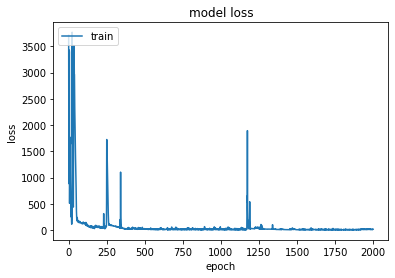

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

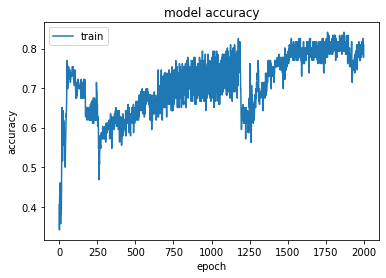

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
india_one_week_mat = list()

In [ ]:
lag=1

In [ ]:
list(labels[labels['location']=='India'].index)

[55]

In [ ]:
for i in list(labels[labels['location']=='India'].index):
  print(i,labels['current_day'].get(i))
  india_one_week_mat.append(train_mat_np[i,labels['current_day'].get(i)-7*(lag+1):labels['current_day'].get(i)-7*lag,:])

55 76


In [ ]:
india_one_week_mat = np.array(india_one_week_mat)

In [ ]:
india_one_week_mat.shape

(1, 7, 6)

In [ ]:
model.predict_proba(india_one_week_mat)

array([[0.]], dtype=float32)

In [ ]:
model.save('model4.h5',model)

In [ ]:
model

In [ ]:
model2 = 